In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import mplfinance as mpf

In [2]:
df = pd.read_csv("Future_tick_101T3.csv")
df = df[df['logdate'] >= 20221218]

In [3]:
df['value'] = df['priceclose'] * df['volume']
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df['logtime'] = df['logtime'].apply( lambda t : '{0:04d}'.format(t))
df['timestamp'] = df['logdate'].astype(str) + df['logtime']
df.drop(['logdate','logtime'],axis=1,inplace=True)
df['timestamp'] = df.timestamp.map(lambda t: datetime.strptime(t, "%Y%m%d%H%M%S"))

In [28]:
timedf = df.set_index('timestamp')

In [46]:
def tickbar(tick, window_size):
    tick = tick.reset_index()
    
    tick['window_number'] = np.arange(len(tick)) // window_size
    groupby = tick.groupby('window_number')
    bars = groupby['priceclose'].ohlc()
    bars[['volume', 'value']] = groupby[['volume', 'value']].sum()
    bars['timestamp'] = groupby['timestamp'].first()
    
    bars.set_index('timestamp', inplace=True)
    
    return bars


In [48]:
tick_df = tickbar(timedf,1000)

In [53]:
def volume_bar(tick, unit_volume):
    tick = tick.reset_index()
    
    tick['window_number'] = tick['volume'].cumsum() // unit_volume
    groupby = tick.groupby('window_number')
    
    bars = groupby['priceclose'].ohlc()
    
    bars[['volume', 'value']] = groupby[['volume', 'value']].sum()
    bars['timestamp'] = groupby['timestamp'].first()
    
    bars.set_index('timestamp', inplace=True)
    
    return bars

In [57]:
vol_bar = volume_bar(timedf,2000)
vol_bar

,open,high,low,close,volume,value
timestamp,,,,,,
2022-12-20 14:01:05,301.899994,302.100006,301.850006,302.049988,1987,600000.203217
2022-12-20 14:01:00,302.100006,302.299988,302.000000,302.000000,2012,607976.753265
2022-12-20 14:00:05,302.000000,302.100006,301.899994,302.000000,1999,603699.049591
2022-12-20 14:00:00,302.000000,302.350006,302.000000,302.250000,1995,602825.544952
2022-12-20 13:05:06,302.250000,302.250000,301.950012,301.950012,2004,605504.954193
...,...,...,...,...,...,...
2022-12-19 09:00:02,304.149994,304.200012,303.700012,303.850006,1993,605843.693970
2022-12-19 09:00:01,303.850006,304.450012,303.799988,304.200012,2003,609164.652069
2022-12-19 09:00:01,304.250000,304.799988,304.100006,304.399994,2004,610182.701843


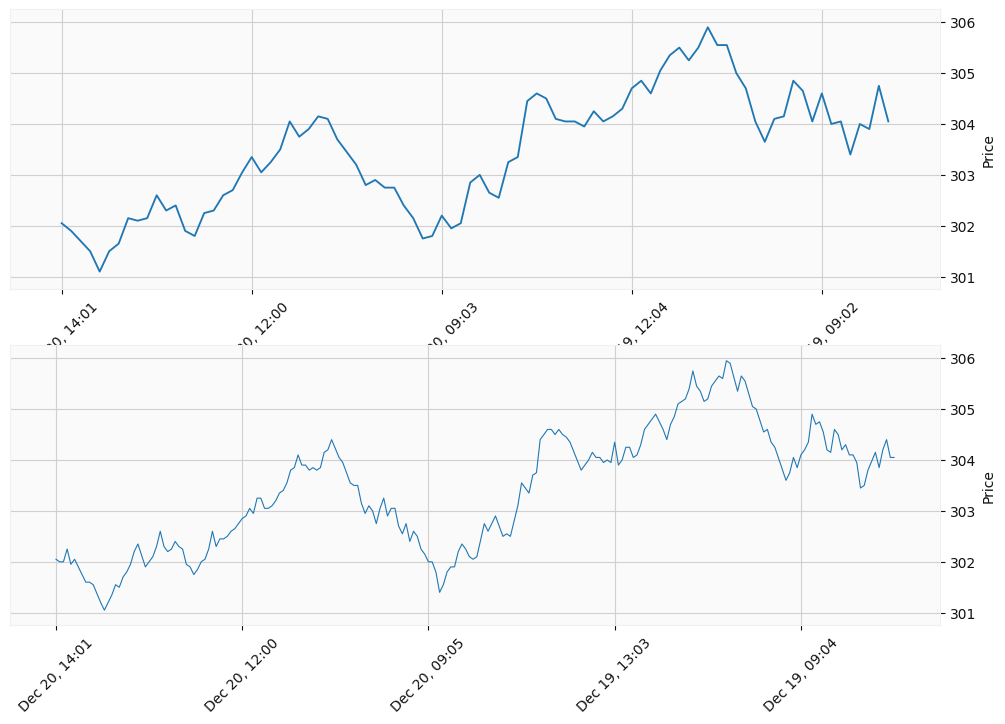

In [62]:
fig = mpf.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,1,1,style='yahoo')
ax2 = fig.add_subplot(2,1,2,style='yahoo')

mpf.plot(tick_df,type = 'line' , ax=ax1)
mpf.plot(vol_bar,type = 'line' , ax=ax2)
mpf.show()


,open,high,low,close,volume,value
timestamp,,,,,,
1220 14,301.899994,302.049988,301.899994,301.950012,585,176637.751770
1220 14,301.950012,302.000000,301.899994,301.899994,642,193856.103943
1220 14,301.899994,302.049988,301.850006,302.000000,361,108996.500092
1220 14,302.049988,302.149994,302.000000,302.149994,436,131687.747589
1220 14,302.100006,302.299988,302.100006,302.250000,520,157152.051331
...,...,...,...,...,...,...
1219 09,304.350006,304.500000,304.350006,304.450012,482,146742.300690
1219 09,304.450012,304.450012,304.200012,304.200012,482,146684.447937
1219 09,304.200012,304.250000,304.049988,304.049988,373,113447.950073
